# Author : Ravindra Mund

# GRIP @ The Sparks Foundation

# Task 2 : Prediction using Unsupervised ML

From the given iris dataset, I tried to predict the optimum number of clusters and represent it visually.

# K-means

When trying to analyze data, we might want to look for meaningful groups or clusters. Clustering is dividing data into groups based on similarity. And K-means is one of the most commonly used methods in clustering which is used when we don't have a labelled data(Unsupervised Learning).

 * The K in ‘K-means’ stands for the number of clusters we’re trying to identify and Elbow Method is the most popular graphical method for finding this.

# Technical Stack : Pandas, Numpy, Matplotlib, Seaborn, Warnings

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# 1. Reading the data from source

In [2]:
iris = pd.read_csv('C:/Users/Freedom/Downloads/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Exploratory Data Analysis

In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### This indicates that data has No Null-Values.

In [5]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

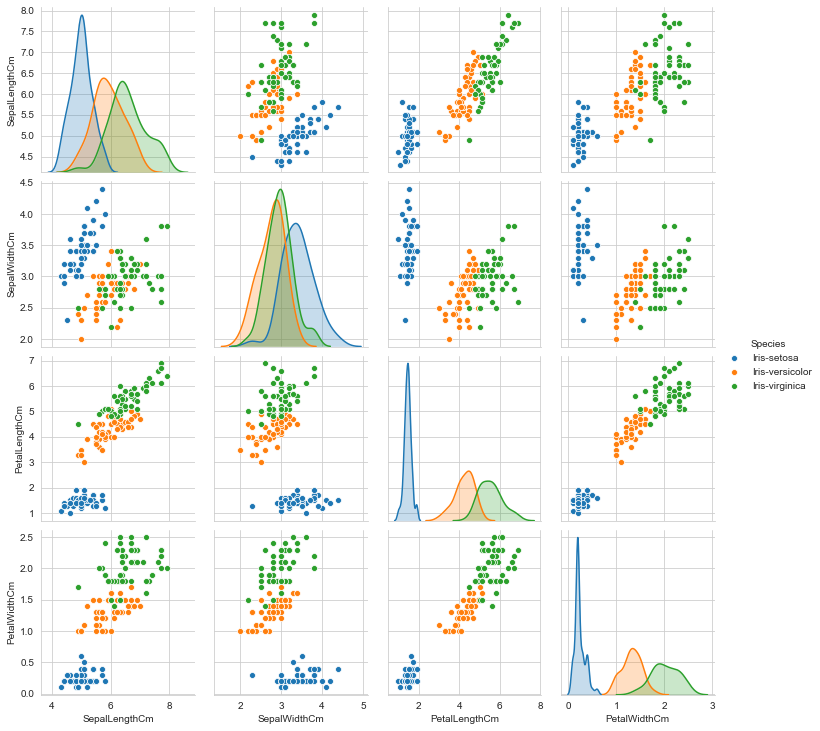

In [6]:
sns.pairplot(iris.iloc[:,1:],hue = 'Species')
plt.show()

We can see that in all the scatter plots, there is a clustering pattern when we 'categorize' by species (especially Setosa), so it is safe to implement KMeans algorithm.

In [7]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

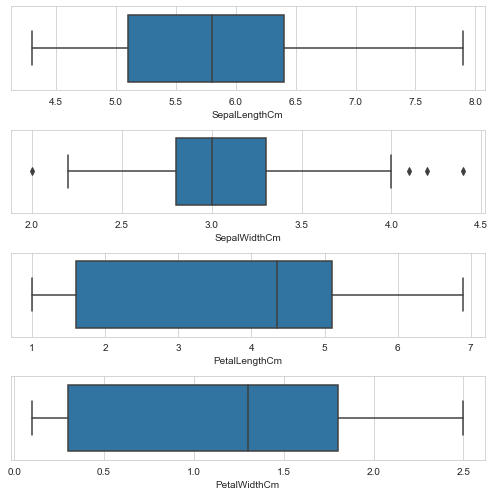

In [8]:
fig,axs = plt.subplots(4,figsize = (7,7))
plt1 = sns.boxplot(iris['SepalLengthCm'],ax = axs[0])
plt2 = sns.boxplot(iris['SepalWidthCm'],ax = axs[1])
plt3 = sns.boxplot(iris['PetalLengthCm'],ax = axs[2])
plt4 = sns.boxplot(iris['PetalWidthCm'],ax = axs[3])
plt.tight_layout()

We can see that there are some outliers in SepalWidthCm, this can affect our models performace since we are working with KMeans (a distance based clustering algorithm). Let's go ahead and winsorize them.

In [9]:
from scipy.stats.mstats import winsorize
winsorize(iris.SepalWidthCm,limits=(1/150,3/150),inplace=True)

masked_array(data=[3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7,
                   3.4, 3. , 3. , 4. , 4. , 3.9, 3.5, 3.8, 3.8, 3.4, 3.7,
                   3.6, 3.3, 3.4, 3. , 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4. ,
                   4. , 3.1, 3.2, 3.5, 3.1, 3. , 3.4, 3.5, 2.3, 3.2, 3.5,
                   3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8,
                   2.8, 3.3, 2.4, 2.9, 2.7, 2.2, 3. , 2.2, 2.9, 2.9, 3.1,
                   3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8,
                   3. , 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3,
                   3. , 2.5, 2.6, 3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5,
                   2.8, 3.3, 2.7, 3. , 2.9, 3. , 3. , 2.5, 2.9, 2.5, 3.6,
                   3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. , 3.8, 2.6, 2.2, 3.2,
                   2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. , 2.8, 3.8,
                   2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
                   3.2, 3.3, 3. , 2.5,

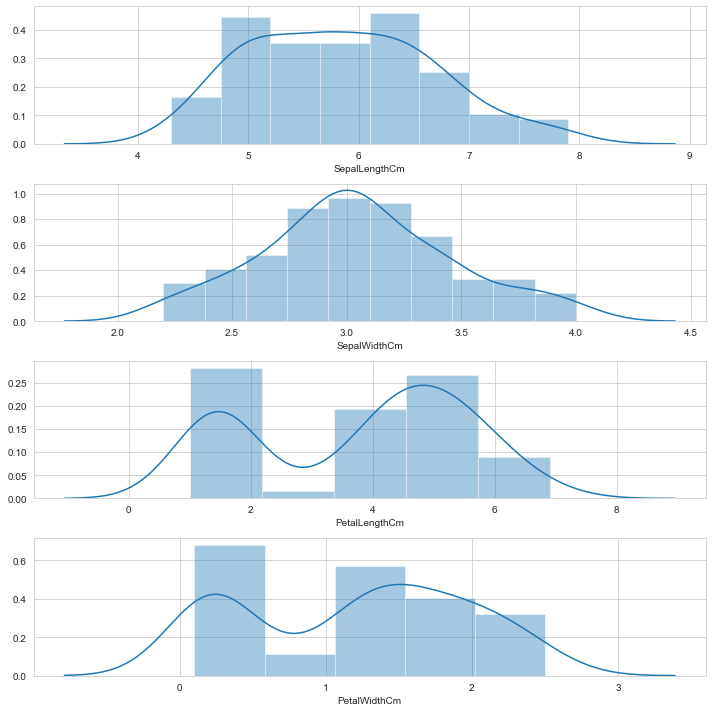

In [10]:
fig,axs = plt.subplots(4,figsize = (10,10))
plt1 = sns.distplot(iris['SepalLengthCm'],ax = axs[0])
plt2 = sns.distplot(iris['SepalWidthCm'],ax = axs[1])
plt3 = sns.distplot(iris['PetalLengthCm'],ax = axs[2])
plt4 = sns.distplot(iris['PetalWidthCm'],ax = axs[3])
plt.tight_layout()

# Evaluating Heat Map

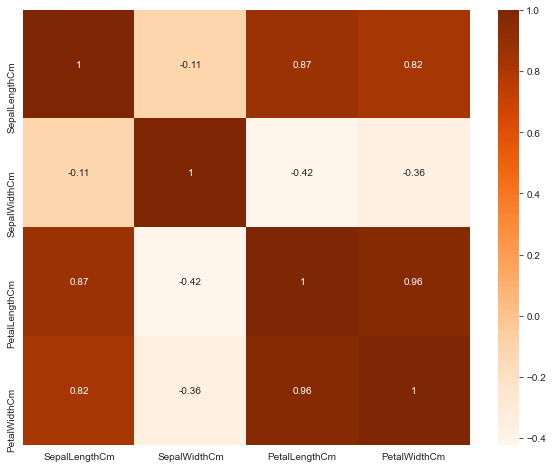

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(iris.iloc[:,1:].corr(),annot=True,cmap='Oranges')
plt.show()

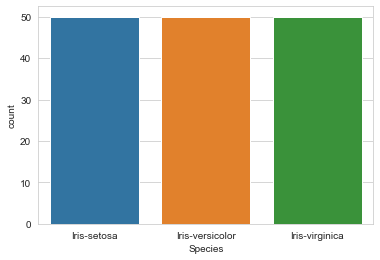

In [12]:
# lets check if we are dealing with a balanced dataset
sns.countplot(iris.Species)
plt.show()

Since there are equal number of flowers in each species, we are dealing with a clean dataset.

# Lets Replace all the String Values in Species with Numeric Values

In [13]:
iris['Species'].replace({'Iris-setosa':1,'Iris-versicolor':0,'Iris-virginica':2},inplace = True)
iris.sample(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
90,91,5.5,2.6,4.4,1.2,0
16,17,5.4,3.9,1.3,0.4,1
123,124,6.3,2.7,4.9,1.8,2
1,2,4.9,3.0,1.4,0.2,1
51,52,6.4,3.2,4.5,1.5,0
110,111,6.5,3.2,5.1,2.0,2


# 3. Data Preprocessing

Since we are using an Unsupervised Algorithm, we only need the Independent Variables for the model building, We'll only use the y-variable to check the accuracy of the Model.

In [14]:
X = iris.iloc[:,1:5]
y = iris.Species

In [15]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: int64

# 4. Model Creation

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans_kwargs = {'init':'k-means++','n_init':10,'max_iter':300,'random_state':42}
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,**kmeans_kwargs)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Inertia :- It is the sum of squared distances of samples to their closest cluster center.

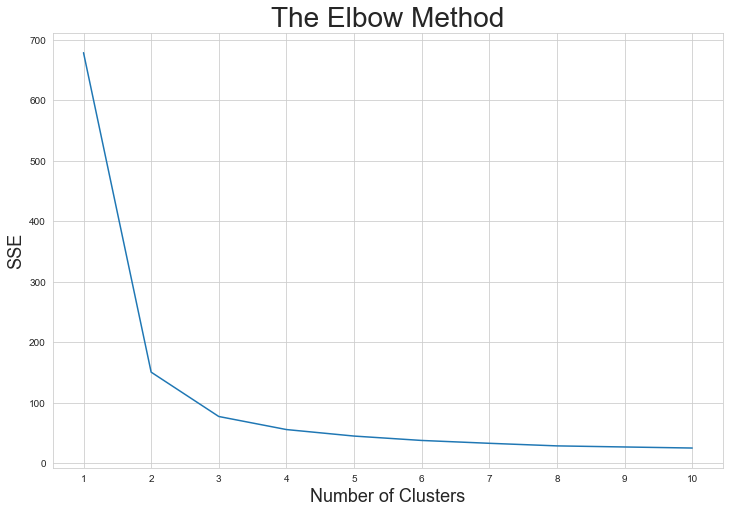

In [19]:
# plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title('The Elbow Method',size=28)
plt.xlabel('Number of Clusters',size=18)
plt.ylabel('SSE',size=18)
plt.show()

#### To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. This is when within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

###        Hence,   Optimum Cluster = 3

#### This is correct! We have 3 species of Iris - Setosa,Versicolor,Virginica and the Elbow Method helped us find this optimum number correctly.

Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

# 5. Model Training

In [20]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(X)

KMeans(n_clusters=3)

In [21]:
print(iris_k_mean_model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [22]:
print(iris_k_mean_model.cluster_centers_)

[[5.006      3.404      1.464      0.244     ]
 [5.9016129  2.7516129  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


# 6. Visualizing the Model Cluster

Text(0.5, 1.0, "Model's Classification")

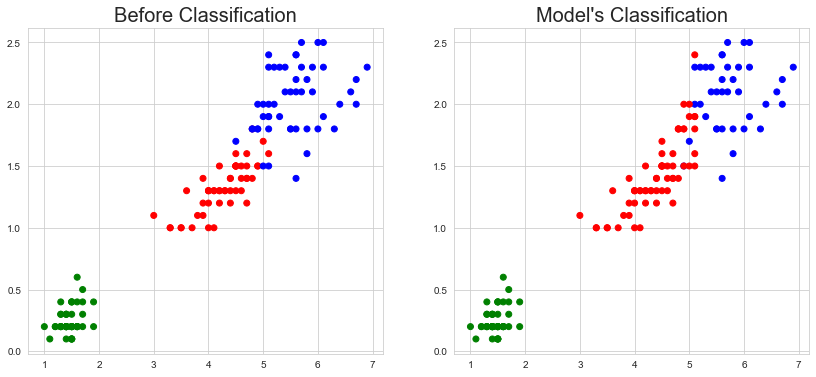

In [23]:
plt.figure(figsize=(14,6))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c=colors[y])
plt.title('Before Classification', size=20)

plt.subplot(1, 2, 2)
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c=colors[predictedY])
plt.title("Model's Classification", size=20)

# 7. Calculating the Accuracy and Confusion Matrix

In [24]:
# Required Module
import sklearn.metrics as sm

sm.accuracy_score(predictedY, y)

0.8933333333333333

In [25]:
sm.confusion_matrix(predictedY, y)

array([[48,  0, 14],
       [ 0, 50,  0],
       [ 2,  0, 36]], dtype=int64)

In a confusion matrix, the predicted class labels (0, 1, 2) are written along the top (column names). The true class labels (Iris-setosa, etc.) are written along the right side. Each cell in the matrix is a count of how many instances of a true class where classified as each of the predicted classes. 

# Conclusion

### I was able to successfully carry-out prediction using Unsupervised Machine Learning task and was able to evaluate the model's clustering accuracy score.

# Thank You